<a href="https://colab.research.google.com/github/Lekashri/naive-bayes-/blob/main/Naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
a = pd.read_csv("card_transdata.csv")

In [ ]:
a.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


In [ ]:
a.tail()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
9994,7.891519,0.142338,0.380634,1,0,0,1,0
9995,4.225100,2.678220,0.556858,1,0,0,1,0
9996,3.614858,0.431593,0.061778,1,0,0,1,0
9997,10.131863,10.262508,2.818090,1,0,0,1,0
9998,16.306236,0.014054,1.904495,1,0,0,1,0


In [ ]:
a.info

<bound method DataFrame.info of       distance_from_home  distance_from_last_transaction  \
0              57.877857                        0.311140   
1              10.829943                        0.175592   
2               5.091079                        0.805153   
3               2.247564                        5.600044   
4              44.190936                        0.566486   
...                  ...                             ...   
9994            7.891519                        0.142338   
9995            4.225100                        2.678220   
9996            3.614858                        0.431593   
9997           10.131863                       10.262508   
9998           16.306236                        0.014054   

      ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                           1.945940                1          1   
1                           1.294219                1          0   
2                           0.427715       

In [ ]:
a.describe

<bound method NDFrame.describe of       distance_from_home  distance_from_last_transaction  \
0              57.877857                        0.311140   
1              10.829943                        0.175592   
2               5.091079                        0.805153   
3               2.247564                        5.600044   
4              44.190936                        0.566486   
...                  ...                             ...   
9994            7.891519                        0.142338   
9995            4.225100                        2.678220   
9996            3.614858                        0.431593   
9997           10.131863                       10.262508   
9998           16.306236                        0.014054   

      ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                           1.945940                1          1   
1                           1.294219                1          0   
2                           0.427715     

In [ ]:
a.shape

(9999, 8)

In [ ]:
import matplotlib.pyplot as plt

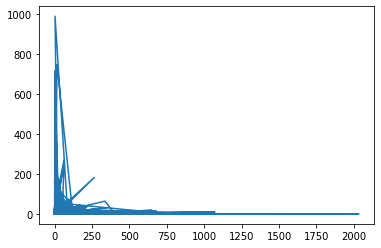

In [ ]:
plt.plot(a.distance_from_home,a.distance_from_last_transaction)

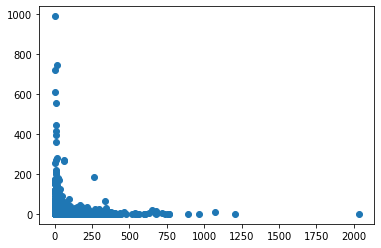

In [ ]:
plt.scatter(a.distance_from_home,a.distance_from_last_transaction)

(array([9.835e+03, 1.310e+02, 1.700e+01, 1.100e+01, 2.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([4.92701040e-02, 2.03394160e+02, 4.06739051e+02, 6.10083941e+02,
        8.13428832e+02, 1.01677372e+03, 1.22011861e+03, 1.42346350e+03,
        1.62680839e+03, 1.83015328e+03, 2.03349817e+03]),
 <a list of 10 Patch objects>)

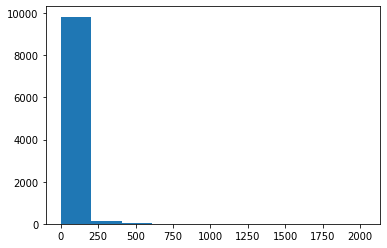

In [ ]:
plt.hist(a.distance_from_home)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.naive_bayes import GaussianNB
import graphviz

In [ ]:
a = pd.read_csv("card_transdata.csv")

{'whiskers': [<matplotlib.lines.Line2D at 0x7f417ba21580>,
 'caps': [<matplotlib.lines.Line2D at 0x7f417ba21c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f417ba21220>],
 'medians': [<matplotlib.lines.Line2D at 0x7f417b9a8340>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f417b9a8640>],
 'means': []}

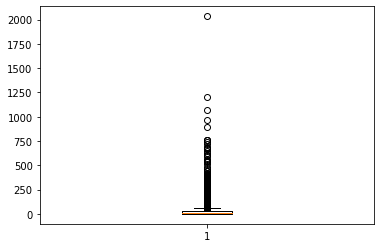

In [ ]:
plt.boxplot(a.distance_from_home)

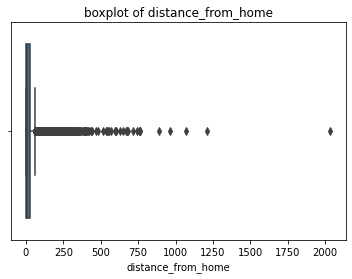

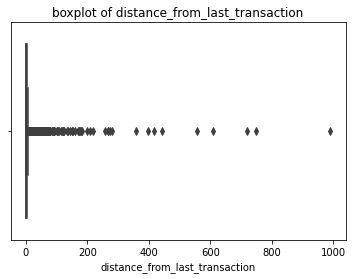

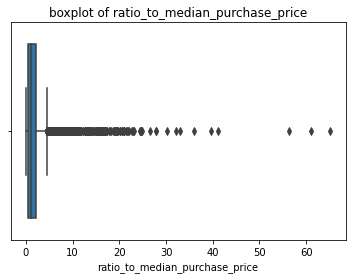

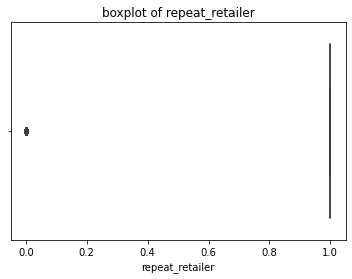

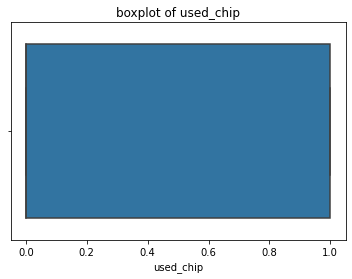

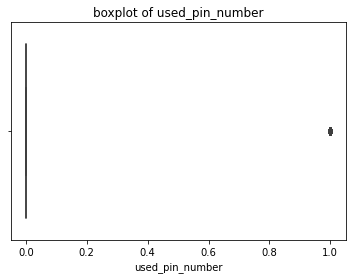

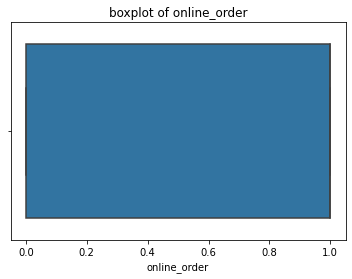

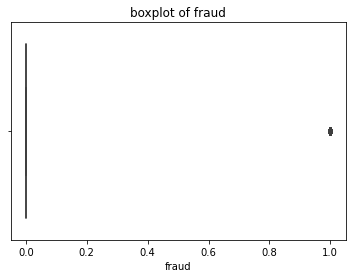

In [ ]:
import seaborn as sns
for col in a.columns:
    sns.boxplot(data=a, x = col)
    plt.title(f"boxplot of {col}")
    plt.show()

In [ ]:
x = a.drop('fraud', axis = 1)
y = a['fraud']

In [ ]:
x.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order'],
      dtype='object')

In [ ]:
a.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [ ]:
a.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

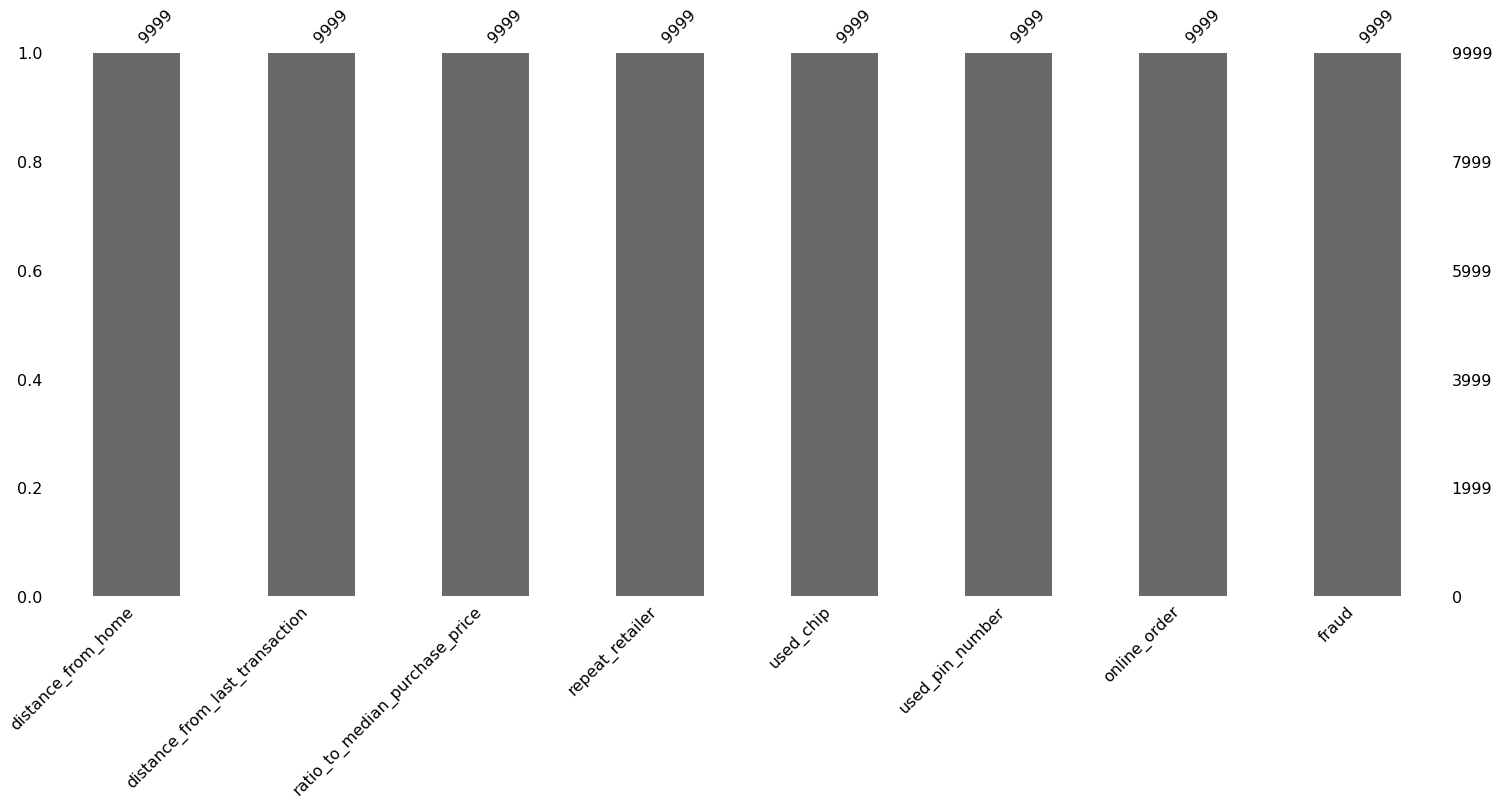

In [ ]:
import missingno as msno
msno.bar(a)
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.5, random_state=0)

In [ ]:
b = StandardScaler()
x_train = b.fit_transform(x_train)
x_test = b.transform(x_test)

In [ ]:

clf = GaussianNB()
clf.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[4477,   92],
       [ 197,  234]])

In [ ]:
from sklearn import metrics
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9422
